# init

In [1]:
import os
from google.colab import drive
from os.path import join as jn

# 구글 드라이브 접근
ROOT = "/content/drive"
try:
  drive.mount(ROOT, force_remount=True)
except:
  drive.mount(ROOT)

# 구글 코랩 경로
colab_P = "MyDrive/Colab Notebooks"
CL_PATH = jn(ROOT, colab_P)

# 구글 깃헙 경로
github_P = "MyDrive/GitHub" #본인 깃헙 레포들 정리할 폴더명 #저는 "GitHub"로 정했습니다만, 수정 가능
GH_PATH = jn(ROOT, github_P)
# # 깃헙 페이지
# GHP_PATH = jn(GH_PATH, "")

## 파이썬 패키지 경로
PIP = "packages"
PIP_PATH = jn(ROOT, "MyDrive", PIP)
## 캐글 경로
KAGGLE = "Kaggle"
KAGGLE_PATH = jn(ROOT, "MyDrive", KAGGLE, ".kaggle")
# # 캐글 프로젝트 경로
# KG = "SkinCancerMnist"
# KG_PATH = jn(ROOT, "MyDrive", KAGGLE, KG)
# # !mkdir "{KG_PATH}"
# os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_PATH
# !pip install --upgrade --force-reinstall --no-deps kaggle

# sub-project
proj = "sub_project"
SUB_PATH = jn(ROOT, "MyDrive", proj, "Docs")
# !mkdir "{SUB_PATH}"
# !mv "{CL_PATH}/OpenCV+Albumentation.ipynb" "{SUB_PATH}/OpenCV+Albumentation.ipynb"

Mounted at /content/drive


# OpenCV tutorial

<img src="https://opencv.org/wp-content/uploads/2021/06/dl-ig-v2-2.png"/>

Writing documentation for OpenCV

```tree
<opencv>
├── doc             - doxygen config files, root page (root.markdown.in), BibTeX file (opencv.bib)
│   ├── tutorials       - tutorials hierarchy (pages and images)
│   └── py_tutorials    - python tutorials hierarchy (pages and images)
├── modules
│   └── <modulename>
│       ├── doc         - documentation pages and images for module
│       └── include     - code documentation in header files
└── samples         - place for all code examples
    ├── cpp
    │   └── tutorial_code   - place for tutorial code examples
    └── ...
```    
```tree
<opencv_contrib>
└── modules
    └── <modulename>
        ├── doc         - documentation pages and images, BibTeX file (<modulename>.bib)
        ├── include     - code documentation in header files
        ├── samples     - place for code examples for documentation and tutorials
        └── tutorials   - tutorial pages and images
```

보통은 이런 식으로 architecture를 구성하지만, 분석만 할 때는 크게 문제되는 부분은 아니기 때문에 자세한 내용은 생략.

단, OpenCV에 대한 개발 블로그를 기획 중이거나, 업무를 할 때 후임 지도 시 편함.

<h2>OpenCV란?</h2>

-----

가볍게 OpenCV에 대해 정의하고 tutorial을 시작하자면, OpenCV는 2D, 3D, Video 등 Computer Vision과 관련 작업을 용이하게 도와주는 패키지

<img src="https://static.packt-cdn.com/products/9781782168812/graphics/8812OS_03_01.jpg"/>

</br>

관련 모듈이나 API도 비교적 많은 편이고 stable한 Open Source가 많은 점이 장점

</br>

C based라 처리 속도는 빠르지만, class, def에 대한 이해, data format에 대한 이해, path-control, algorithm 등 Flow Architectures에 관한 이해가 높지 않다면 활용이 쉽지 않을 수 있음

<img src="https://www.oreilly.com/library/view/learning-opencv/9780596516130/httpatomoreillycomsourceoreillyimages212535.png"/>

</br>

즉, OpenCV에서 Analysis, Machine Learning, Deep Learning이 차지하는 비중은 높으나 그게 전부는 아님

<img src="https://www.researchgate.net/profile/Andrey-Sozykin/publication/301657929/figure/fig1/AS:355398595956737@1461745036967/Extended-architecture-of-the-MIPr-framework-new-blocks-are-gray.png"/>

다양한 프로그래밍 언어로 접근이 가능하고, 분석을 위해 알아야하는 패키지인만큼 땅굴을 파는 깊이를 얕게 하고자 한다면 Pipeline(or Flow diagram)을 초반부터 구체화한 뒤 진입하는 것을 추천

<h2>Related Documentation Pages</h2>

-----

수업 중 배웠던 내용으로 바탕으로, 분석에 필요한 OpenCV의 Documents를 정리하면 다음과 같음.
* <a href="https://docs.opencv.org/master/d1/dfb/intro.html" target="_blank">Introduction</a>
* <a href="https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html" target="_blank">Color conversions</a>
* <a href="https://docs.opencv.org/master/dc/dd6/ml_intro.html" target="_blank">Machine Learning Overview</a>
* <a href="https://docs.opencv.org/master/db/deb/tutorial_display_image.html" target="_blank">Getting Started with Images</a>
  * cv2.imread
  * cv2.imshow
  * cv2.imwrite
* <a href="https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html" target="_blank">Image Processing(imgproc module)</a>
  * Basic
  * Transformations
  * Histograms
  * Contours
  * Others
* <a href="https://docs.opencv.org/master/d3/dd5/tutorial_table_of_content_other.html" target="_blank">Other tutorials(ml, objdetect, photo, stitching, video)</a>
  * ml.Introduction to Support Vector Machines(SVM)
  * ml.Support Vector Machines for Non-Linearly Separable Data
  * ml.Introduction to Principal Component Analysis(PCA)
  * objdetect.Cascade Classifier
  * objdetect.Cascade Classifier Training

In [4]:
import cv2 as cv
print(cv.__version__)

4.1.2


In [7]:
!pip show opencv-python
!pip show opencv-contrib-python
# opencv-contrib-python         4.1.2.30
# opencv-python                 4.1.2.30

Name: opencv-python
Version: 4.1.2.30
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations
Name: opencv-contrib-python
Version: 4.1.2.30
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: 


In [25]:
import os
import sys
import cv2 as cv
from glob import glob as gb
# gb("/usr/local/lib/python3.7/dist-packages/*cv*")

import matplotlib.pyplot as plt
%matplotlib inline

* IMREAD_COLOR : BGR(8비트)형식으로 이미지 로드(imread했을 때의 기본값)
* IMREAD_UNCHANGED : 알파 채널도 있다면(이미지 정보 내), 알파 채널을 포함해서 이미지 로드
* IMREAD_GRAYSCALE : 명도만 확인할 수 있도록 이미지 로드

OpenCV에서 지원하는 확장자는 다음과 같다.

bmp, pbm, pgm, ppm, sr, ras, jpeg, jpg, jpe, jp2, tiff, tif, png OpenEXR

In [53]:
# !git clone https://github.com/opencv/opencv.git
# import shutil
# shutil.copytree("./opencv/samples/data", "./sample_data/data")
# !rm -rf opencv

In [54]:
# img = cv.imread(cv.samples.findFile("starry_night.jpg"))
img = cv.imread("./sample_data/data/starry_night.jpg")

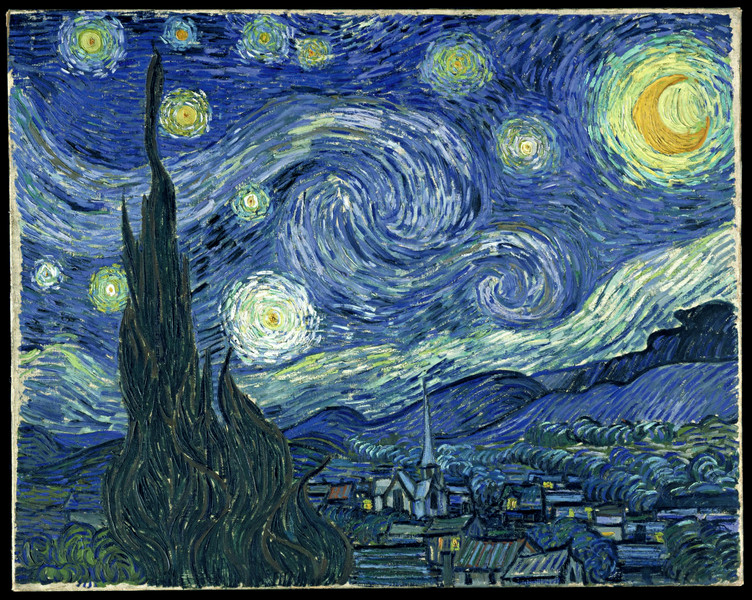

In [63]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [64]:
def cv_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv.cvtColor(a, cv.COLOR_BGRA2RGBA)
        else:
            a = cv.cvtColor(a, cv.COLOR_BGR2RGB)
    return plt.imshow(a, **kwargs)

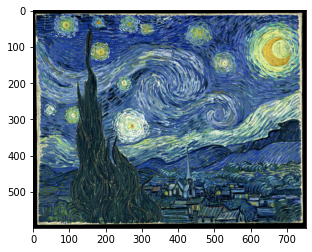

In [65]:
cv_imshow(img)

In [79]:
def cvtColor_imshow(a, color=None, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    kwargs = kwargs
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv.cvtColor(a, cv.COLOR_BGRA2RGBA)
        elif color=="gray":
            a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
        else:
            a = cv.cvtColor(a, cv.COLOR_BGR2RGB)
    return plt.imshow(a, **kwargs)

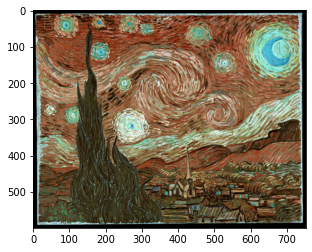

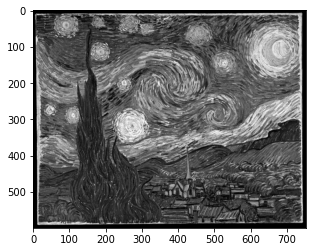

In [83]:
cmap = {"cmap":"gist_gray"}
plt.imshow(img, **cmap)
plt.show()
cvtColor_imshow(img, color='gray', **cmap)
plt.show()

In [61]:
img.shape

(600, 752, 3)

In [88]:
def cvtColor_resize_imshow(a, color=None, pixels=None, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    kwargs = kwargs
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv.cvtColor(a, cv.COLOR_BGRA2RGBA)
        elif color=="gray":
            a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
        else:
            a = cv.cvtColor(a, cv.COLOR_BGR2RGB)
    if pixels != None:
        # 사이즈 확대 시, INTER_CUBIN, INTER_LINEAR
        if (a.shape[0]<pixels[0]) and (a.shape[1]<pixels[1]):
            a = cv.resize(a, pixels, interpolation=cv.INTER_CUBIC)
        elif ((a.shape[0]<pixels[0])&(a.shape[1]==pixels[1])) or ((a.shape[0]==pixels[0])&(a.shape[1]<pixels[1])):
            a = cv.resize(a, pixels, interpolation=cv.INTER_LINEAR)
        else: # 사이즈를 줄일 때, INTER_AREA
            a = cv.resize(a, pixels, interpolation=cv.INTER_AREA)
    return plt.imshow(a, **kwargs)

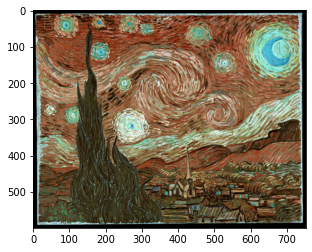

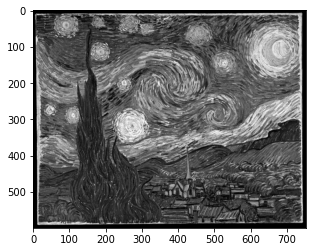

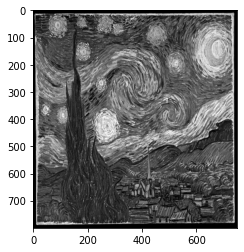

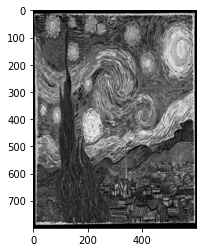

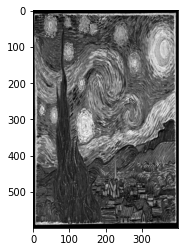

In [89]:
cmap = {"cmap":"gist_gray"}
plt.imshow(img, **cmap)
plt.show()
cvtColor_resize_imshow(img, color='gray', **cmap)
plt.show()
cvtColor_resize_imshow(img, color='gray', pixels=(750, 800), **cmap)
plt.show()
cvtColor_resize_imshow(img, color='gray', pixels=(600, 800), **cmap)
plt.show()
cvtColor_resize_imshow(img, color='gray', pixels=(400, 600), **cmap)
plt.show()

In [91]:
def cvtColor_resize(a, color=None, pixels=None):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv.cvtColor(a, cv.COLOR_BGRA2RGBA)
        elif color=="gray":
            a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
        else:
            a = cv.cvtColor(a, cv.COLOR_BGR2RGB)
    if pixels != None:
        # 사이즈 확대 시, INTER_CUBIN, INTER_LINEAR
        if (a.shape[0]<pixels[0]) and (a.shape[1]<pixels[1]):
            a = cv.resize(a, pixels, interpolation=cv.INTER_CUBIC)
        elif ((a.shape[0]<pixels[0])&(a.shape[1]==pixels[1])) or ((a.shape[0]==pixels[0])&(a.shape[1]<pixels[1])):
            a = cv.resize(a, pixels, interpolation=cv.INTER_LINEAR)
        else: # 사이즈를 줄일 때, INTER_AREA
            a = cv.resize(a, pixels, interpolation=cv.INTER_AREA)
    return a

re_img = cvtColor_resize(img, color='gray', pixels=(750, 800))

In [93]:
cv.imwrite("./resized_gray_starry_night.png", re_img)

True

In [98]:
reload_re_img = cv.imread("./resized_gray_starry_night.png")
reload_re_img.shape
# cv2_imshow(reload_re_img)

(800, 750, 3)

그러나 위에서 설명했듯이, 그냥 imread로 불러오면 BGR로 load되기 때문에 imread할 때 흑백으로 불러와야 함

cv2_imshow(reload_re_img)를 사용했을 때, 흑백으로 시각화되기는 했음

In [99]:
reload_re_img = cv.imread("./resized_gray_starry_night.png", cv.IMREAD_GRAYSCALE)
reload_re_img.shape

(800, 750)

In [102]:
reload_re_img.max()

255

이렇게 불러진 파일은 L(Luminance)로 칭하기도 함

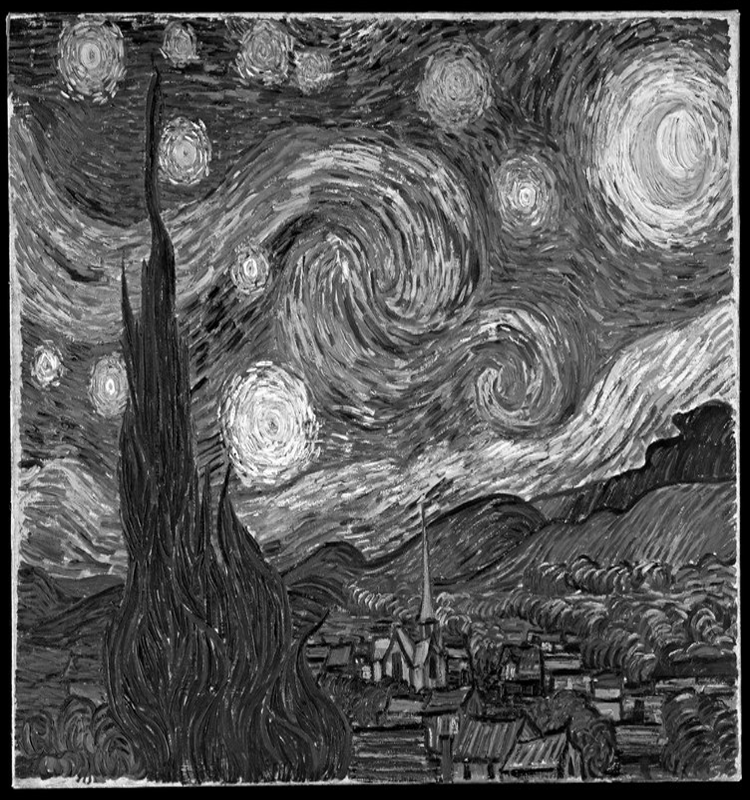

In [100]:
cv2_imshow(reload_re_img)

이미지 비율도 다르게 resize하고 grayscale로 바뀌었기에 매우 기괴하지만, 음각 판화 같기도 하며 유화의 특성이 도드라진 변형. 

<h3>RGB[A] to Gray: </h3>
$$Y {\leftarrow} 0.299 {\cdot} R + 0.587 {\cdot} G + 0.114 {\cdot} B$$

<h3>Gray to RGB[A]: </h3> 
$$R {\leftarrow} Y, G {\leftarrow} Y, B {\leftarrow} Y, A {\leftarrow} max(ChannelRange)$$

<h3>RGB $\leftrightarrow$ HSV: </h3>
$$V\leftarrow{max(R,G,B)}$$

$$S\leftarrow\begin{cases}\frac{V\:-min(R,G,B)}{V}\;\;\;\mathrm{if\:V\:\neq\:0}\\0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\mathrm{otherwise}\end{cases}$$

$$H\leftarrow\begin{cases}60(G-B)/(B-min(R,G,B)\;\;\;\;\;\;\;\;\;\;\;\;\;\mathrm{if}\:V=R\\120+60(B-R)/(V-min(R,G,B))\;\;\;\mathrm{if}\:V=G\\240+60(R-G)/(V-min(R,G,B))\;\;\;\mathrm{if}\:V=B\\0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\mathrm{if}\:R=G=B\end{cases}$$

  <small>$${If H<0 then H←H+360 . On output 0≤V≤1, 0≤S≤1, 0≤H≤360.}$$</small>

  * 8-bit images: V←255V,S←255S,H←H/2(to fit to 0 to 255)
  * 16-bit images: (currently not supported) V<−65535V,S<−65535S,H<−H
  * 32-bit images: H, S, and V are left as is

OpenCV의 공식문서에 따르면, 그들이 사용하는 값은 상기와 같다. 하지만 사용하는 패키지가 OpenCV가 아니라면 해당 패키지의 공식문서를 확인하는 것을 추천한다.

기본값도 다르고, 변환 시 사용하는 수치도 약간의 차이가 있기 때문이다.

<a href="https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray%20documentation">Color Conversion</a>

# Albumentations

<big><b>Albumentations : fast and flexible image augmentations</b></big>

빠르고 유연한 이미지 증강을 위한 파이썬 라이브러리.

다양하고 최적화된 이미지 변형으로 효율적으로 증강이 가능하며, 객체 분류, 세분화, 탐지를 포함한 다양한 컴퓨터 비전 업무 처리에 매우 강력한 편.

PyTorch나 Keras와 같은 딥러닝 프레임워크에서도 사용할 수 있음.

In [8]:
!pip show albumentations

Name: albumentations
Version: 0.1.12
Summary: Fast image augmentation library and easy to use wrapper around other libraries
Home-page: https://github.com/albu/albumentations
Author: Buslaev Alexander, Alexander Parinov, Vladimir Iglovikov, Eugene Khvedchenya
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, imgaug, numpy, scipy
Required-by: 


<h2>Augmentation(Mathmatics)</h2>

-----

* **Augmentation ideal**, in mathematics, an ideal in a group ring
* **Augmented matrix**, in mathematics, a matrix formed by placing two other matrices side-by-side
* **Augmentation(algebra)**, a certain algebra homomorphism
* ~~**Augmentation(geometry)**, a way of enlarging a polyhedron~~(현 수준에서 절대 설명 불가함)

<h3>Augmentation ideal</h3>

-----

  선형대수학에서 Augmentation ideal은 어떠한 group ring()으로 정의될 수 있는 ideal()을 의미



<h3>Augmentation matrix</h3>

-----


${\sum}r{_i}g{_i}{\rightarrow}{\sum}r{_i}()$

<h3>Augmentation(algebra)</h3>

-----



<h3>Augmentation(geometry)</h3>

<a href="https://en.wikipedia.org/wiki/Johnson_solid#Names">wikipedia: Augmentation(geometry)</a>

-----

<table class="wikitable" width="640">

<tbody><tr>
<th>Regular
</th>
<th>J1
</th>
<th>J2
</th></tr>
<tr align="center">
<td>Triangular pyramid<br />(<a href="/wiki/Tetrahedron" title="Tetrahedron">Tetrahedron</a>)
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">Square pyramid</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">Pentagonal pyramid</a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/120px-Tetrahedron.png" decoding="async" width="120" height="120" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/180px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/240px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/120px-Square_pyramid.png" decoding="async" width="120" height="74" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/180px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/240px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/120px-Pentagonal_pyramid.png" decoding="async" width="120" height="74" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/180px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/240px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Tetrahedron_flat.svg" class="image"><img alt="Tetrahedron flat.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Tetrahedron_flat.svg/120px-Tetrahedron_flat.svg.png" decoding="async" width="120" height="105" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Tetrahedron_flat.svg/180px-Tetrahedron_flat.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Tetrahedron_flat.svg/240px-Tetrahedron_flat.svg.png 2x" data-file-width="212" data-file-height="185" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_1_net.png" class="image"><img alt="Johnson solid 1 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Johnson_solid_1_net.png/120px-Johnson_solid_1_net.png" decoding="async" width="120" height="120" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Johnson_solid_1_net.png/180px-Johnson_solid_1_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Johnson_solid_1_net.png/240px-Johnson_solid_1_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_2_net.png" class="image"><img alt="Johnson solid 2 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/08/Johnson_solid_2_net.png/120px-Johnson_solid_2_net.png" decoding="async" width="120" height="120" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/08/Johnson_solid_2_net.png/180px-Johnson_solid_2_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/08/Johnson_solid_2_net.png/240px-Johnson_solid_2_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td></tr>
<tr>
<th colspan="3">Related regular polyhedra
</th></tr>
<tr align="center">
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">Tetrahedron</a>
</td>
<td><a href="/wiki/Octahedron" title="Octahedron">Octahedron</a>
</td>
<td><a href="/wiki/Icosahedron" title="Icosahedron">Icosahedron</a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/120px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/160px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Octahedron.png" class="image"><img alt="Octahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/80px-Octahedron.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/120px-Octahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/160px-Octahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Icosahedron.png" class="image"><img alt="Icosahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Icosahedron.png/80px-Icosahedron.png" decoding="async" width="80" height="84" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Icosahedron.png/120px-Icosahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/63/Icosahedron.png/160px-Icosahedron.png 2x" data-file-width="911" data-file-height="952" /></a>
</td></tr></tbody></table>

<table class="wikitable" width="640">

<tbody><tr>
<th colspan="3"><a href="/wiki/Elongated_pyramid" title="Elongated pyramid">Elongated pyramids</a>
</th>
<th colspan="3"><a href="/wiki/Gyroelongated_pyramid" title="Gyroelongated pyramid">Gyroelongated pyramids</a>
</th></tr>
<tr>
<th>J7
</th>
<th>J8
</th>
<th>J9
</th>
<th>Coplanar
</th>
<th>J10
</th>
<th>J11
</th></tr>
<tr align="center">
<td><a href="/wiki/Elongated_triangular_pyramid" title="Elongated triangular pyramid">Elongated triangular pyramid</a>
</td>
<td><a href="/wiki/Elongated_square_pyramid" title="Elongated square pyramid">Elongated square pyramid</a>
</td>
<td><a href="/wiki/Elongated_pentagonal_pyramid" title="Elongated pentagonal pyramid">Elongated pentagonal pyramid</a>
</td>
<td>Gyroelongated triangular pyramid<br />(<a href="/wiki/Diminished_trapezohedron" title="Diminished trapezohedron">diminished trigonal trapezohedron</a>)
</td>
<td><a href="/wiki/Gyroelongated_square_pyramid" title="Gyroelongated square pyramid">Gyroelongated square pyramid</a>
</td>
<td><a href="/wiki/Gyroelongated_pentagonal_pyramid" title="Gyroelongated pentagonal pyramid">Gyroelongated pentagonal pyramid</a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Elongated_triangular_pyramid.png" class="image"><img alt="Elongated triangular pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Elongated_triangular_pyramid.png/80px-Elongated_triangular_pyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Elongated_triangular_pyramid.png/120px-Elongated_triangular_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Elongated_triangular_pyramid.png/160px-Elongated_triangular_pyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Elongated_square_pyramid.png" class="image"><img alt="Elongated square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Elongated_square_pyramid.png/80px-Elongated_square_pyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Elongated_square_pyramid.png/120px-Elongated_square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Elongated_square_pyramid.png/160px-Elongated_square_pyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Elongated_pentagonal_pyramid.png" class="image"><img alt="Elongated pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Elongated_pentagonal_pyramid.png/80px-Elongated_pentagonal_pyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Elongated_pentagonal_pyramid.png/120px-Elongated_pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Elongated_pentagonal_pyramid.png/160px-Elongated_pentagonal_pyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Augmented_octahedron.png" class="image"><img alt="Augmented octahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Augmented_octahedron.png/80px-Augmented_octahedron.png" decoding="async" width="80" height="106" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Augmented_octahedron.png/120px-Augmented_octahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Augmented_octahedron.png/160px-Augmented_octahedron.png 2x" data-file-width="486" data-file-height="644" /></a>
</td>
<td><a href="/wiki/File:Gyroelongated_square_pyramid.png" class="image"><img alt="Gyroelongated square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Gyroelongated_square_pyramid.png/80px-Gyroelongated_square_pyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Gyroelongated_square_pyramid.png/120px-Gyroelongated_square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Gyroelongated_square_pyramid.png/160px-Gyroelongated_square_pyramid.png 2x" data-file-width="320" data-file-height="320" /></a>
</td>
<td><a href="/wiki/File:Gyroelongated_pentagonal_pyramid.png" class="image"><img alt="Gyroelongated pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Gyroelongated_pentagonal_pyramid.png/80px-Gyroelongated_pentagonal_pyramid.png" decoding="async" width="80" height="65" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Gyroelongated_pentagonal_pyramid.png/120px-Gyroelongated_pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Gyroelongated_pentagonal_pyramid.png/160px-Gyroelongated_pentagonal_pyramid.png 2x" data-file-width="412" data-file-height="333" /></a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Johnson_solid_7_net.png" class="image"><img alt="Johnson solid 7 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Johnson_solid_7_net.png/80px-Johnson_solid_7_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Johnson_solid_7_net.png/120px-Johnson_solid_7_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Johnson_solid_7_net.png/160px-Johnson_solid_7_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_8_net.png" class="image"><img alt="Johnson solid 8 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Johnson_solid_8_net.png/80px-Johnson_solid_8_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Johnson_solid_8_net.png/120px-Johnson_solid_8_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Johnson_solid_8_net.png/160px-Johnson_solid_8_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_9_net.png" class="image"><img alt="Johnson solid 9 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Johnson_solid_9_net.png/80px-Johnson_solid_9_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Johnson_solid_9_net.png/120px-Johnson_solid_9_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/06/Johnson_solid_9_net.png/160px-Johnson_solid_9_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Augmented_octahedgon_net.png" class="image"><img alt="Augmented octahedgon net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/07/Augmented_octahedgon_net.png/80px-Augmented_octahedgon_net.png" decoding="async" width="80" height="37" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/07/Augmented_octahedgon_net.png/120px-Augmented_octahedgon_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/07/Augmented_octahedgon_net.png/160px-Augmented_octahedgon_net.png 2x" data-file-width="1373" data-file-height="631" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_10_net.png" class="image"><img alt="Johnson solid 10 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Johnson_solid_10_net.png/80px-Johnson_solid_10_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Johnson_solid_10_net.png/120px-Johnson_solid_10_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Johnson_solid_10_net.png/160px-Johnson_solid_10_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_11_net.png" class="image"><img alt="Johnson solid 11 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Johnson_solid_11_net.png/80px-Johnson_solid_11_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Johnson_solid_11_net.png/120px-Johnson_solid_11_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Johnson_solid_11_net.png/160px-Johnson_solid_11_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td></tr>
<tr align="center">
<th colspan="6">Augmented from polyhedra
</th></tr>
<tr align="center">
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">tetrahedron</a><br /><a href="/wiki/Triangular_prism" title="Triangular prism">triangular prism</a>
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">square pyramid</a><br /><a href="/wiki/Cube" title="Cube">cube</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">pentagonal pyramid</a><br /><a href="/wiki/Pentagonal_prism" title="Pentagonal prism">pentagonal prism</a>
</td>
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">tetrahedron</a><br /><a href="/wiki/Octahedron" title="Octahedron">octahedron</a>
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">square pyramid</a><br /><a href="/wiki/Square_antiprism" title="Square antiprism">square antiprism</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">pentagonal pyramid</a><br /><a href="/wiki/Pentagonal_antiprism" title="Pentagonal antiprism">pentagonal antiprism</a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/40px-Tetrahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/60px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a> <a href="/wiki/File:Triangular_prism.png" class="image"><img alt="Triangular prism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/40px-Triangular_prism.png" decoding="async" width="40" height="51" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/60px-Triangular_prism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/80px-Triangular_prism.png 2x" data-file-width="730" data-file-height="925" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/40px-Square_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/60px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/80px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a> <a href="/wiki/File:Hexahedron.png" class="image"><img alt="Hexahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/40px-Hexahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/60px-Hexahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/80px-Hexahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/40px-Pentagonal_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/60px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/80px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a> <a href="/wiki/File:Pentagonal_prism.png" class="image"><img alt="Pentagonal prism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/40px-Pentagonal_prism.png" decoding="async" width="40" height="37" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/60px-Pentagonal_prism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/80px-Pentagonal_prism.png 2x" data-file-width="967" data-file-height="903" /></a>
</td>
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/40px-Tetrahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/60px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a> <a href="/wiki/File:Octahedron.png" class="image"><img alt="Octahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/40px-Octahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/60px-Octahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/80px-Octahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/40px-Square_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/60px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/80px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a> <a href="/wiki/File:Square_antiprism.png" class="image"><img alt="Square antiprism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/40px-Square_antiprism.png" decoding="async" width="40" height="38" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/60px-Square_antiprism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/80px-Square_antiprism.png 2x" data-file-width="950" data-file-height="893" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/40px-Pentagonal_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/60px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/80px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a> <a href="/wiki/File:Pentagonal_antiprism.png" class="image"><img alt="Pentagonal antiprism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/40px-Pentagonal_antiprism.png" decoding="async" width="40" height="35" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/60px-Pentagonal_antiprism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/80px-Pentagonal_antiprism.png 2x" data-file-width="991" data-file-height="864" /></a>
</td></tr></tbody></table>

<table class="wikitable" width="900" height="500">

<tbody><tr>
<th colspan="3"><a href="/wiki/Bipyramid" title="Bipyramid">Bipyramids</a>
</th>
<th colspan="3"><a href="/wiki/Elongated_bipyramid" title="Elongated bipyramid">Elongated bipyramids</a>
</th>
<th colspan="3"><a href="/wiki/Gyroelongated_bipyramid" title="Gyroelongated bipyramid">Gyroelongated bipyramids</a>
</th></tr>
<tr>
<th>J12
</th>
<th>Regular
</th>
<th>J13
</th>
<th>J14
</th>
<th>J15
</th>
<th>J16
</th>
<th>Coplanar
</th>
<th>J17
</th>
<th>Regular
</th></tr>
<tr align="center">
<td><a href="/wiki/Triangular_bipyramid" title="Triangular bipyramid">Triangular bipyramid</a>
</td>
<td>Square bipyramid<br />(<a href="/wiki/Octahedron" title="Octahedron">octahedron</a>)
</td>
<td><a href="/wiki/Pentagonal_bipyramid" title="Pentagonal bipyramid">Pentagonal bipyramid</a>
</td>
<td><a href="/wiki/Elongated_triangular_bipyramid" title="Elongated triangular bipyramid">Elongated triangular bipyramid</a>
</td>
<td><a href="/wiki/Elongated_square_bipyramid" title="Elongated square bipyramid">Elongated square bipyramid</a>
</td>
<td><a href="/wiki/Elongated_pentagonal_bipyramid" title="Elongated pentagonal bipyramid">Elongated pentagonal bipyramid</a>
</td>
<td>Gyroelongated triangular bipyramid<br />(<a href="/wiki/Trigonal_trapezohedron" title="Trigonal trapezohedron">trigonal trapezohedron</a>)
</td>
<td><a href="/wiki/Gyroelongated_square_bipyramid" title="Gyroelongated square bipyramid">Gyroelongated square bipyramid</a>
</td>
<td>Gyroelongated pentagonal bipyramid<br />(<a href="/wiki/Icosahedron" title="Icosahedron">icosahedron</a>)
</td></tr>
<tr>
<td><a href="/wiki/File:Triangular_dipyramid.png" class="image"><img alt="Triangular dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Triangular_dipyramid.png/80px-Triangular_dipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Triangular_dipyramid.png/120px-Triangular_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Triangular_dipyramid.png/160px-Triangular_dipyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Octahedron.png" class="image"><img alt="Octahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/80px-Octahedron.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/120px-Octahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/160px-Octahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_dipyramid.png" class="image"><img alt="Pentagonal dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Pentagonal_dipyramid.png/80px-Pentagonal_dipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Pentagonal_dipyramid.png/120px-Pentagonal_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/79/Pentagonal_dipyramid.png/160px-Pentagonal_dipyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Elongated_triangular_dipyramid.png" class="image"><img alt="Elongated triangular dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Elongated_triangular_dipyramid.png/80px-Elongated_triangular_dipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Elongated_triangular_dipyramid.png/120px-Elongated_triangular_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Elongated_triangular_dipyramid.png/160px-Elongated_triangular_dipyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Elongated_square_dipyramid.png" class="image"><img alt="Elongated square dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Elongated_square_dipyramid.png/80px-Elongated_square_dipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Elongated_square_dipyramid.png/120px-Elongated_square_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Elongated_square_dipyramid.png/160px-Elongated_square_dipyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Elongated_pentagonal_dipyramid.png" class="image"><img alt="Elongated pentagonal dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Elongated_pentagonal_dipyramid.png/80px-Elongated_pentagonal_dipyramid.png" decoding="async" width="80" height="87" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Elongated_pentagonal_dipyramid.png/120px-Elongated_pentagonal_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Elongated_pentagonal_dipyramid.png/160px-Elongated_pentagonal_dipyramid.png 2x" data-file-width="461" data-file-height="501" /></a>
</td>
<td><a href="/wiki/File:Gyroelongated_triangular_bipyramid.png" class="image"><img alt="Gyroelongated triangular bipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Gyroelongated_triangular_bipyramid.png/80px-Gyroelongated_triangular_bipyramid.png" decoding="async" width="80" height="72" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Gyroelongated_triangular_bipyramid.png/120px-Gyroelongated_triangular_bipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Gyroelongated_triangular_bipyramid.png/160px-Gyroelongated_triangular_bipyramid.png 2x" data-file-width="535" data-file-height="481" /></a>
</td>
<td><a href="/wiki/File:Gyroelongated_square_dipyramid.png" class="image"><img alt="Gyroelongated square dipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Gyroelongated_square_dipyramid.png/80px-Gyroelongated_square_dipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Gyroelongated_square_dipyramid.png/120px-Gyroelongated_square_dipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/af/Gyroelongated_square_dipyramid.png/160px-Gyroelongated_square_dipyramid.png 2x" data-file-width="512" data-file-height="512" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_gyroelongated_bipyramid.png" class="image"><img alt="Pentagonal gyroelongated bipyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Pentagonal_gyroelongated_bipyramid.png/80px-Pentagonal_gyroelongated_bipyramid.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Pentagonal_gyroelongated_bipyramid.png/120px-Pentagonal_gyroelongated_bipyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Pentagonal_gyroelongated_bipyramid.png/160px-Pentagonal_gyroelongated_bipyramid.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td></tr>
<tr>
<td><a href="/wiki/File:Johnson_solid_12_net.png" class="image"><img alt="Johnson solid 12 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Johnson_solid_12_net.png/80px-Johnson_solid_12_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Johnson_solid_12_net.png/120px-Johnson_solid_12_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Johnson_solid_12_net.png/160px-Johnson_solid_12_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Octahedron_flat.svg" class="image"><img alt="Octahedron flat.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Octahedron_flat.svg/80px-Octahedron_flat.svg.png" decoding="async" width="80" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Octahedron_flat.svg/120px-Octahedron_flat.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Octahedron_flat.svg/160px-Octahedron_flat.svg.png 2x" data-file-width="362" data-file-height="272" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_13_net.png" class="image"><img alt="Johnson solid 13 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/62/Johnson_solid_13_net.png/80px-Johnson_solid_13_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/62/Johnson_solid_13_net.png/120px-Johnson_solid_13_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/62/Johnson_solid_13_net.png/160px-Johnson_solid_13_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_14_net.png" class="image"><img alt="Johnson solid 14 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Johnson_solid_14_net.png/80px-Johnson_solid_14_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Johnson_solid_14_net.png/120px-Johnson_solid_14_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Johnson_solid_14_net.png/160px-Johnson_solid_14_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_15_net.png" class="image"><img alt="Johnson solid 15 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Johnson_solid_15_net.png/80px-Johnson_solid_15_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Johnson_solid_15_net.png/120px-Johnson_solid_15_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Johnson_solid_15_net.png/160px-Johnson_solid_15_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Johnson_solid_16_net.png" class="image"><img alt="Johnson solid 16 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Johnson_solid_16_net.png/80px-Johnson_solid_16_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Johnson_solid_16_net.png/120px-Johnson_solid_16_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Johnson_solid_16_net.png/160px-Johnson_solid_16_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td>
</td>
<td><a href="/wiki/File:Johnson_solid_17_net.png" class="image"><img alt="Johnson solid 17 net.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/69/Johnson_solid_17_net.png/80px-Johnson_solid_17_net.png" decoding="async" width="80" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/69/Johnson_solid_17_net.png/120px-Johnson_solid_17_net.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/69/Johnson_solid_17_net.png/160px-Johnson_solid_17_net.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Icosahedron_flat.svg" class="image"><img alt="Icosahedron flat.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Icosahedron_flat.svg/80px-Icosahedron_flat.svg.png" decoding="async" width="80" height="41" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Icosahedron_flat.svg/120px-Icosahedron_flat.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Icosahedron_flat.svg/160px-Icosahedron_flat.svg.png 2x" data-file-width="236" data-file-height="120" /></a>
</td></tr>
<tr align="center">
<th colspan="9">Augmented from polyhedra
</th></tr>
<tr align="center">
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">tetrahedron</a>
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">square pyramid</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">pentagonal pyramid</a>
</td>
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">tetrahedron</a><br /><a href="/wiki/Triangular_prism" title="Triangular prism">triangular prism</a>
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">square pyramid</a><br /><a href="/wiki/Cube" title="Cube">cube</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">pentagonal pyramid</a><br /><a href="/wiki/Pentagonal_prism" title="Pentagonal prism">pentagonal prism</a>
</td>
<td><a href="/wiki/Tetrahedron" title="Tetrahedron">tetrahedron</a><br /><a href="/wiki/Octahedron" title="Octahedron">Octahedron</a>
</td>
<td><a href="/wiki/Square_pyramid" title="Square pyramid">square pyramid</a><br /><a href="/wiki/Square_antiprism" title="Square antiprism">square antiprism</a>
</td>
<td><a href="/wiki/Pentagonal_pyramid" title="Pentagonal pyramid">pentagonal pyramid</a><br /><a href="/wiki/Pentagonal_antiprism" title="Pentagonal antiprism">pentagonal antiprism</a>
</td></tr>
<tr align="center">
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/40px-Tetrahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/60px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/40px-Square_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/60px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/80px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/40px-Pentagonal_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/60px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/80px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a>
</td>
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/40px-Tetrahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/60px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a> <a href="/wiki/File:Triangular_prism.png" class="image"><img alt="Triangular prism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/40px-Triangular_prism.png" decoding="async" width="40" height="51" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/60px-Triangular_prism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Triangular_prism.png/80px-Triangular_prism.png 2x" data-file-width="730" data-file-height="925" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/40px-Square_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/60px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/80px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a> <a href="/wiki/File:Hexahedron.png" class="image"><img alt="Hexahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/40px-Hexahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/60px-Hexahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hexahedron.png/80px-Hexahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/40px-Pentagonal_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/60px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/80px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a> <a href="/wiki/File:Pentagonal_prism.png" class="image"><img alt="Pentagonal prism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/40px-Pentagonal_prism.png" decoding="async" width="40" height="37" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/60px-Pentagonal_prism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Pentagonal_prism.png/80px-Pentagonal_prism.png 2x" data-file-width="967" data-file-height="903" /></a>
</td>
<td><a href="/wiki/File:Tetrahedron.png" class="image"><img alt="Tetrahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/40px-Tetrahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/60px-Tetrahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tetrahedron.png/80px-Tetrahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a> <a href="/wiki/File:Octahedron.png" class="image"><img alt="Octahedron.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/40px-Octahedron.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/60px-Octahedron.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Octahedron.png/80px-Octahedron.png 2x" data-file-width="1000" data-file-height="1000" /></a>
</td>
<td><a href="/wiki/File:Square_pyramid.png" class="image"><img alt="Square pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/40px-Square_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/60px-Square_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Square_pyramid.png/80px-Square_pyramid.png 2x" data-file-width="420" data-file-height="259" /></a> <a href="/wiki/File:Square_antiprism.png" class="image"><img alt="Square antiprism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/40px-Square_antiprism.png" decoding="async" width="40" height="38" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/60px-Square_antiprism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/29/Square_antiprism.png/80px-Square_antiprism.png 2x" data-file-width="950" data-file-height="893" /></a>
</td>
<td><a href="/wiki/File:Pentagonal_pyramid.png" class="image"><img alt="Pentagonal pyramid.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/40px-Pentagonal_pyramid.png" decoding="async" width="40" height="25" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/60px-Pentagonal_pyramid.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Pentagonal_pyramid.png/80px-Pentagonal_pyramid.png 2x" data-file-width="413" data-file-height="255" /></a> <a href="/wiki/File:Pentagonal_antiprism.png" class="image"><img alt="Pentagonal antiprism.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/40px-Pentagonal_antiprism.png" decoding="async" width="40" height="35" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/60px-Pentagonal_antiprism.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Pentagonal_antiprism.png/80px-Pentagonal_antiprism.png 2x" data-file-width="991" data-file-height="864" /></a>
</td></tr></tbody></table>

# Additional Infomations

<h2>Flow Architectures</h2>

-----

<h3>Image Processing</h3>
<p><b>Simple robust road lane detection algorithm</b></br><img alt="Figure 6.General flowchart of the lane detection algorithm" src="https://d3i71xaburhd42.cloudfront.net/3f8525db6218850d403994f8d0e9a877b0dd4dca/500px/3-Figure6-1.png"/><small><a href="https://www.semanticscholar.org/paper/Simple-robust-road-lane-detection-algorithm-Low-Zamzuri/3f8525db6218850d403994f8d0e9a877b0dd4dca#extracted">DOI: 10.1109/ICIAS.2014.6869550(2014)</a></small></p>
</br></br>
<h3>Object Detection</h3>
<p><b>The analysis of lane detection algorithms using histogram shapes and Hough transform</b></br><img alt="Figure 5.The flowchart of the process" src="https://d3i71xaburhd42.cloudfront.net/d2a9eb99d8ed09e0839373b5fc63cb0955a1030d/10-Figure5-1.png"/><small><a href="https://www.semanticscholar.org/paper/The-analysis-of-lane-detection-algorithms-using-and-Ketcham-Ganokratanaa/d2a9eb99d8ed09e0839373b5fc63cb0955a1030d">DOI: 10.1108/IJICC-05-2014-0024(2015)</a></small></p>
</br>
<p><b>A Precise Lane Detection Algorithm Based on Top View Image Transformation and Least-Square Approaches</b></br><img alt="" src="https://www.researchgate.net/publication/285392542/figure/fig11/AS:324686765412355@1454422765548/The-flow-diagram-of-the-lane-detection-algorithms-using-the-top-view-transformation-and.png"/><small><a href="https://www.researchgate.net/publication/285392542_A_Precise_Lane_Detection_Algorithm_Based_on_Top_View_Image_Transformation_and_Least-Square_Approaches">DOI: 10.1155/2016/4058093(2016)</a></small></p>
</br></br>
<h3>Hybrid Pipelines</h3>
<p><b>Hybrid CV/DL pipelines with OpenCV 4.4 G-API</b></p>

* Purpose : Building a basic "privacy masking" application
<img alt="Figure 1.Example output of the privacy masking pipeline" src="https://opencv.org/wp-content/uploads/2020/07/privacy_masking_camera-1-1024x595-1.png"/>

* modules
  * OpenCV
  * G-API
  * OpenVINO$^{TM}$
* Graph Structure(as an example)
<p><img alt="Figure 2.Privacy masking pipeline data flow" src="https://opencv.org/wp-content/uploads/2020/07/image.png"/><img alt="Figure 3.Naive (serial) execution model" src="https://opencv.org/wp-content/uploads/2020/07/image-1.png"/><img alt="Figure 4.Pipelined (streaming) execution model" src="https://opencv.org/wp-content/uploads/2020/07/image-2.png"/><img alt="Figure 5.G-API Programming model" src="https://opencv.org/wp-content/uploads/2020/07/image-4.png"/><img alt="Figure 6.G-API development workflow" src="https://opencv.org/wp-content/uploads/2020/07/image-5.png"/><img alt="Figure 7.Privacy masking pipeline mapped to G-API operations" src="https://opencv.org/wp-content/uploads/2020/07/image-6.png"/><small><a href="https://opencv.org/hybrid-cv-dl-pipelines-with-opencv-4-4-g-api/">Dmitry Matveev(Software Engineering Manager, Intel Corporation)-2020</a></small></p>

</br>

물론 데이터와 분석 목표에 따라 각각의 Flow Chart가 달라지겠지만, steps-by-steps가 잘 이어져야 한다는 점은 동일함

</br>

<a href="https://docs.opencv.org/master/pages.html" target="_blank">Related Pages</a>나 <a href="https://docs.opencv.org/master/modules.html" target="_blank">Modules</a>를 참고하면 어떤 방식으로 분석 방향을 전개하는가 대한 간략한 가이드를 잡을 수 있음